In [68]:
from IPython.display import Audio
import librosa
import librosa.display
from scipy.io.wavfile import write
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
plt.rcParams["figure.figsize"] = (14,10)
plt.rcParams.update({'font.size': 14})

# **Playing an Audio File**

In [48]:
Audio("/content/drive/MyDrive/Colab Notebooks/TUDev + YouTube Vids/YouTube Vids/Python - Reading and Writting Audio Files!/Rockin' Robin by Bobby Day.mp3")

Output hidden; open in https://colab.research.google.com to view.

# **Reading an Audio File into an array**

## **Parameter Inputs**

### **Data - Can be one of the following:**

- **Numpy 1d array containing the desired waveform (mono)**

- **Numpy 2d array containing waveforms for each channel.**

- **String containing the filename**

- **Bytestring containing raw PCM data or**

- **URL pointing to a file on the web.**

### **Sample Rate - The sampling rate refers to the number of samples of audio recorded every second. The most common sample rate for digital audio is 44100 Hertz; this means that the CT sound-wave is sampled 44100 times every second.**

<sup>Source: [A [Mathematical] Analysis of Sample Rates and Audio Quality](https://blogs.umass.edu/Techbytes/2018/04/20/a-mathematical-analysis-of-sample-rates-and-audio-quality/) by Noah Sheridan</sup>

In [49]:
audio_array,sr = librosa.load("/content/drive/MyDrive/Colab Notebooks/TUDev + YouTube Vids/YouTube Vids/Python - Reading and Writting Audio Files!/Rockin' Robin by Bobby Day.mp3")

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [50]:
audio_array.shape

(3550208,)

In [51]:
sr

22050

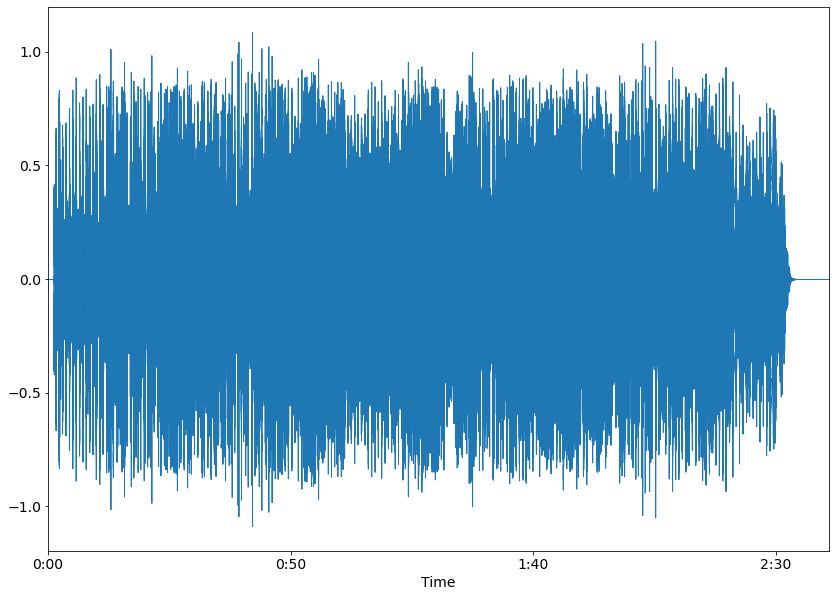

In [52]:
librosa.display.waveplot(audio_array, sr=sr);

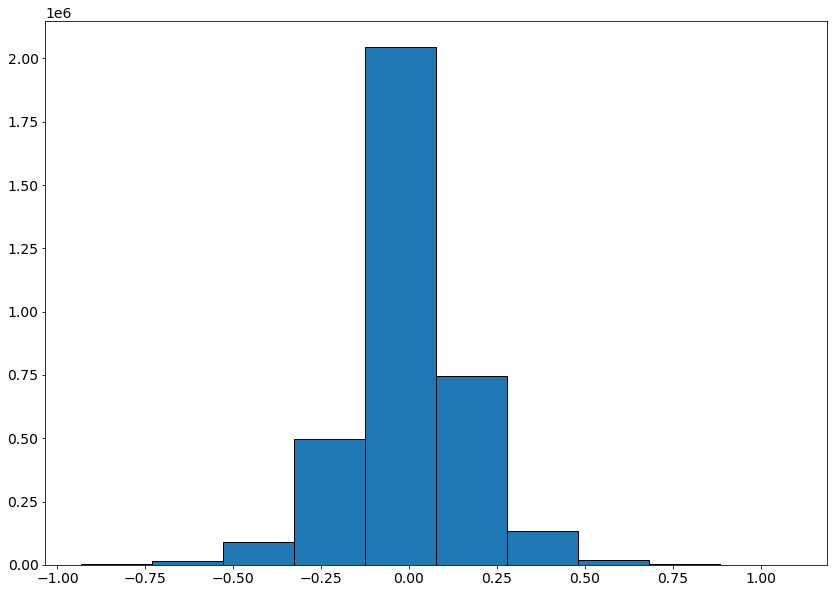

In [53]:
plt.hist(audio_array, edgecolor = 'black');

In [54]:
edited_audio = audio_array**2

In [55]:
Audio(edited_audio, rate = sr)

Output hidden; open in https://colab.research.google.com to view.

# **Creating an Audio File**

In [56]:
uni_data = np.random.uniform(-1,1,50000)
Audio(uni_data, rate=44100)

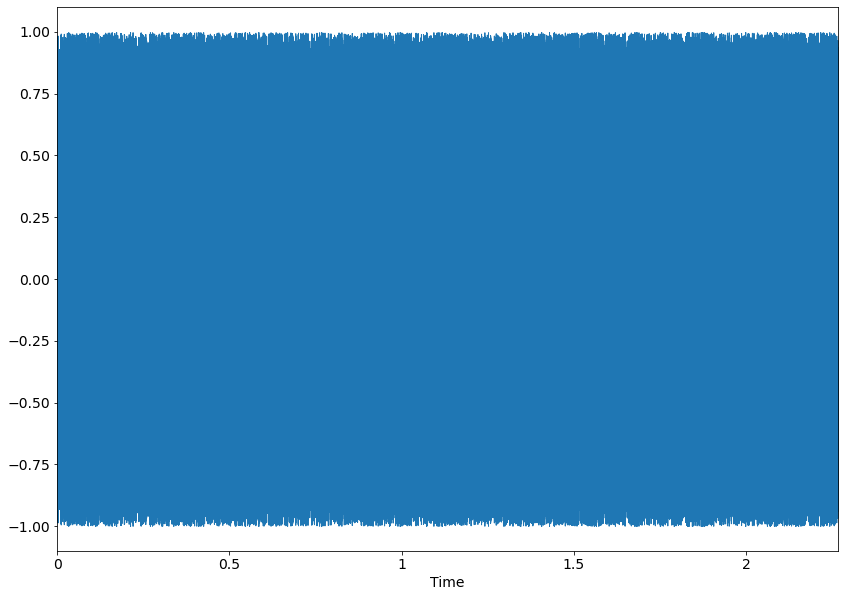

In [57]:
librosa.display.waveplot(uni_data);

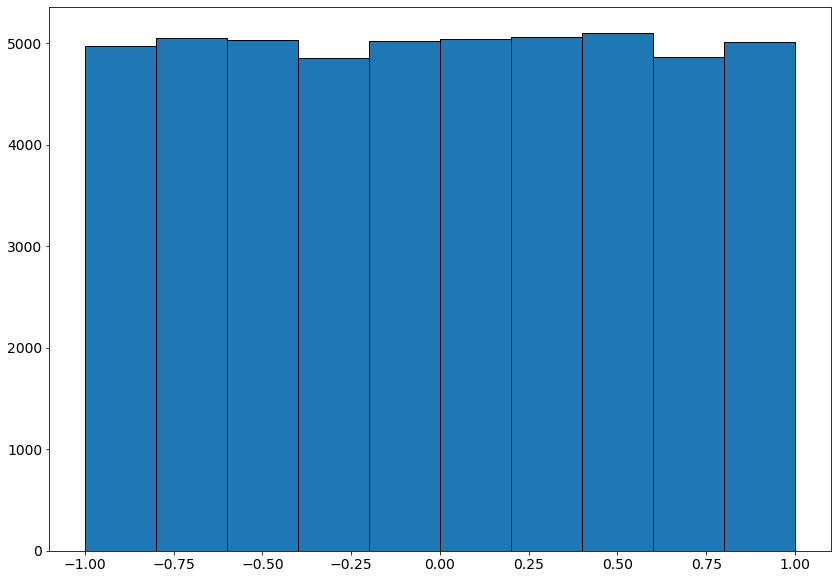

In [59]:
plt.hist(uni_data, edgecolor = 'black');

# **Coding the intro to Avicii's Fade into Darkness**

<sup>Source Code: [How to Play Music Using Mathematics in Python](https://towardsdatascience.com/mathematics-of-music-in-python-b7d838c84f72) by Nishu Jain</sup>

**Wave Function: $Wf(x) = (A) \ sin(2\pi \ Ft): \text{where $A=$ Amplitude, $F=$frequency, $t$ = time}$**

<sup>Source: [How to Play Music Using Mathematics in Python](https://towardsdatascience.com/mathematics-of-music-in-python-b7d838c84f72) by Nishu Jain</sup>

In [60]:
samplerate = 44100

def get_wave(freq, duration=0.5):
    '''
    Function takes the "frequecy" and "time_duration" for a wave 
    as the input and returns a "numpy array" of values at all points 
    in time
    '''
    
    amplitude = 4096
    t = np.linspace(0, duration, int(samplerate * duration))
    wave = amplitude * np.sin(2 * np.pi * freq * t)
    
    return wave

In [61]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/TUDev + YouTube Vids/YouTube Vids/Python - Reading and Writting Audio Files!/note_frequencies.xlsx')

<sup>Source Data: [Frequencies for equal-tempered scale](https://pages.mtu.edu/~suits/notefreqs.html) by  Bryan H. Suits</sup>

In [62]:
df

,Note,Frequency (Hz),Wavelength (cm)
0,C0,16.35,2109.89
1,C#0,17.32,1991.47
2,D0,18.35,1879.69
3,D#0,19.45,1774.20
4,E0,20.60,1674.62
...,...,...,...
103,G8,6271.93,5.50
104,G#8,6644.88,5.19
105,A8,7040.00,4.90
106,A#8,7458.62,4.63


In [63]:
def get_piano_notes():
    '''
    Returns a dict object for all the piano 
    note's frequencies
    '''

    octave = df['Note'].to_list()
    freq = df['Frequency (Hz)'].to_list()
    
    note_freqs = {note:sound for note,sound in zip(octave,freq)}
    note_freqs[''] = 0.0
    
    return note_freqs
  

note_freqs = get_piano_notes()

In [64]:
def get_song_data(music_notes):
    '''
    Function to concatenate all the waves (notes)
    '''
    note_freqs = get_piano_notes() 
    song = [get_wave(note_freqs[note]) for note in music_notes.split('-')]
    song = np.concatenate(song)
    return song

music_notes = 'F#3-F#4-A#4-C#5-D#5-F#5-F#4-C#5-G#4-F#4-F4-F#4-F#3-F#4-A#4-C#5-D#5-F#5-F#4-C#5-G#4-F#4-F4-F#4-D#3-F#4-A#4-C#5-D#5-F#5-F#4-C#5-G#4-F#4-F4-F#4'
data = get_song_data(music_notes)

data = data * (16300/np.max(data)) 

In [65]:
write('fade_into_darkness.wav', samplerate, data.astype(np.int16))

In [66]:
Audio('/content/fade_into_darkness.wav')

Output hidden; open in https://colab.research.google.com to view.

# **References and Additional Learning**

## **Article**

- **[Analysis of Sample Rates and Audio Quality](https://blogs.umass.edu/Techbytes/2018/04/20/a-mathematical-analysis-of-sample-rates-and-audio-quality/) by Noah Sheridan**

- **[How to Play Music Using Mathematics in Python](https://towardsdatascience.com/mathematics-of-music-in-python-b7d838c84f72) by Nishu Jain</sup>**

## **Frequency Data**

- **[Frequencies for equal-tempered scale](https://pages.mtu.edu/~suits/notefreqs.html) by  Bryan H. Suits**

## **Video**

- **[Mathematics of Music](https://www.youtube.com/channel/UC5G6pckR64hW9GOgo_R7bpg/about) by Nishu Jain** 

## **Websites**

- **[Jupyter Audio Basics from Notes on Music Information Retrieval](https://musicinformationretrieval.com/ipython_audio.html)**

- **[librosa documentation](https://librosa.org/doc/latest/index.html)**

- **[Module display for IPython](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html)**

# **Connect**

- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [Twitter](https://twitter.com/DolinayG) and [GitHub](https://github.com/ad17171717). Happy coding!**